In [ ]:
# Import
import tensorflow as tf
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt

tf.random.set_seed(1111)

In [ ]:
# Load datasets
(x_train, y_train), (x_test, y_test) = load_data(path='mnist.npz')

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.3, random_state = 1111)

# Preprocessing
# -> Changing values to 0~1
x_train = x_train.reshape((x_train.shape[0], 28,28,1))
x_val = x_val.reshape((x_val.shape[0], 28,28,1))
x_test = x_test.reshape((x_test.shape[0], 28,28,1))
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test /255.


# -> One-hot encoding
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

# Feature Extraction stage
model = Sequential()
model.add(Conv2D(32, (3,3), strides=(1, 1),activation = 'relu', input_shape=(28,28,1))) # Filter, size, stride, activation, input_shape
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), strides=(1, 1),activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), strides=(1, 1),activation = 'relu'))

# Fully Connected layer
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

11490434/11490434 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                         

In [ ]:
# Model Compile and Training
model.compile(optimizer = 'adam',
          loss = 'categorical_crossentropy',
          metrics = ['accuracy'])

history = model.fit(x_train, y_train, epochs=9, batch_size = 256, validation_data = (x_val, y_val))
results = model.predict(x_test)

Epoch 1/10
165/165 [==============================] - 46s 272ms/step - loss: 0.0655 - accuracy: 0.9797 - val_loss: 0.0535 - val_accuracy: 0.9836
Epoch 2/10
165/165 [==============================] - 48s 290ms/step - loss: 0.0505 - accuracy: 0.9848 - val_loss: 0.0467 - val_accuracy: 0.9856
Epoch 3/10
165/165 [==============================] - 44s 266ms/step - loss: 0.0395 - accuracy: 0.9880 - val_loss: 0.0519 - val_accuracy: 0.9840
Epoch 4/10
165/165 [==============================] - 35s 214ms/step - loss: 0.0359 - accuracy: 0.9889 - val_loss: 0.0372 - val_accuracy: 0.9886
Epoch 5/10
165/165 [==============================] - 35s 215ms/step - loss: 0.0278 - accuracy: 0.9915 - val_loss: 0.0433 - val_accuracy: 0.9863
Epoch 6/10
165/165 [==============================] - 35s 215ms/step - loss: 0.0234 - accuracy: 0.9926 - val_loss: 0.0424 - val_accuracy: 0.9863
Epoch 7/10
165/165 [==============================] - 35s 211ms/step - loss: 0.0215 - accuracy: 0.9932 - val_loss: 0.0365 - val_ac

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Metric
print(classification_report(np.argmax(y_test, axis = -1), np.argmax(results, axis = -1)))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      1.00      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.98      1.00      0.99       982
           5       0.98      0.99      0.99       892
           6       1.00      0.97      0.99       958
           7       0.98      1.00      0.99      1028
           8       1.00      0.98      0.99       974
           9       1.00      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



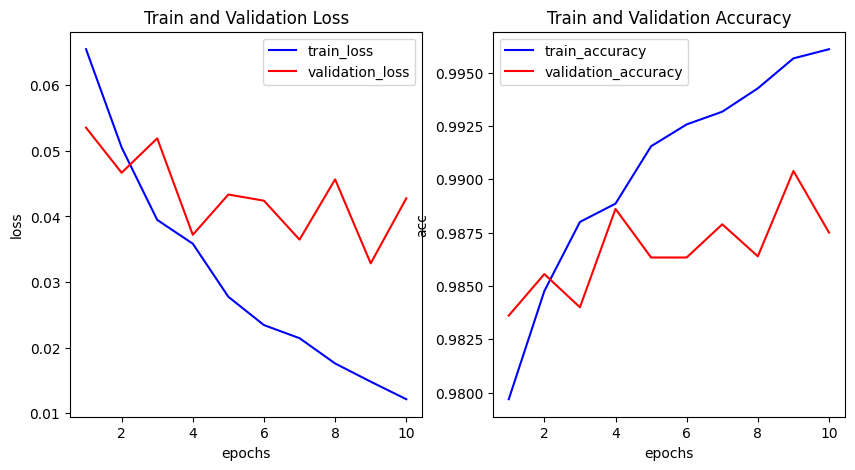

In [ ]:
# Visualization
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10,5))

ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'red', label = 'validation_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['accuracy']
val_acc = his_dict['val_accuracy']

ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_accuracy')
ax2.plot(epochs, val_acc, color = 'red', label = 'validation_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()
plt.show()